In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from feature_engine.outliers import Winsorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('../Data/df_transformed.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['LBXTC', 'RIAGENDR', 'RIDRETH3', 'RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI',
       'BPXPLS', 'BPXPULS', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR',
       'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TSODI', 'DR1TVD', 'DR1TCALC', 'DR1TIRON', 'DR1TPOTA', 'DR1_300',
       'ALQ120Q', 'ALQ120U', 'ALQ130', 'BPQ020', 'BPQ050A', 'BPQ080',
       'BPQ100D', 'DIQ010', 'MCQ170M', 'SMQ681', 'PAQ610', 'PAD615', 'PAQ625',
       'PAD630', 'PAQ655', 'PAD660', 'PAQ670', 'PAD675', 'Systolic',
       'Diastolic', 'MET_work', 'MET_rec', 'DR1TKCAL_t', 'DR1TPROT_t',
       'DR1TCARB_t', 'DR1TSUGR_t', 'DR1TFIBE_t', 'DR1TTFAT_t', 'DR1TSFAT_t',
       'DR1TMFAT_t', 'DR1TPFAT_t', 'DR1TCHOL_t', 'DR1TSODI_t', 'DR1TVD_t',
       'DR1TCALC_t', 'DR1TIRON_t', 'DR1TPOTA_t', 'avgALC', 'log_LBXTC'],
      dtype='object')

In [3]:
numerical_variables = ['RIAGENDR','RIDAGEYR','BMXBMI','BPXPLS','DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR',
       'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TSODI', 'DR1TVD', 'DR1TCALC', 'DR1TIRON', 'DR1TPOTA','MET_rec','Systolic','Diastolic']
categorical_variables = ['RIDRETH3','DR1_300']

In [4]:
df1 = df[numerical_variables+categorical_variables+['LBXTC']].copy()

In [5]:
df1.dropna(inplace=True)

In [6]:
y = df1.LBXTC
X = df1.drop('LBXTC', axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=625)

In [11]:
numeric_transformer = Pipeline(steps=[('winsorizer',Winsorizer(capping_method='iqr'))])
cat_transformer = Pipeline(steps=[('one_hot',OneHotEncoder(handle_unknown='error',drop='first'))])

preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,numerical_variables),
    ('cat',cat_transformer,categorical_variables)])

In [12]:
lr1 = Pipeline(steps =[
    ('preprocessor',preprocessor),
    ('ols', LinearRegression())])

In [13]:
lr1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr'))]),
                                                  ['RIAGENDR', 'RIDAGEYR',
                                                   'BMXBMI', 'BPXPLS',
                                                   'DR1TKCAL', 'DR1TPROT',
                                                   'DR1TCARB', 'DR1TSUGR',
                                                   'DR1TFIBE', 'DR1TTFAT',
                                                   'DR1TSFAT', 'DR1TMFAT',
                                                   'DR1TPFAT', 'DR1TCHOL',
                                                   'DR1TSODI', 'DR1TVD',
                                                   'DR1TCALC', 'DR1TIRON',
                                                   'DR1T

In [15]:
y_preds_training = lr1.predict(X_train)
y_preds = lr1.predict(X_test)
print('RMSE training score:',mean_squared_error(y_train,y_preds_training,squared=False))
print('RMSE test score:',mean_squared_error(y_test,y_preds,squared=False))

RMSE training score: 40.78223847611773
RMSE test score: 41.16847205187039


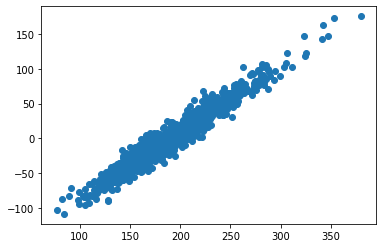

In [16]:
residuals=y_test - y_preds
plt.scatter(x=y_test,y=residuals)

Not a very good estimator, trying with the adjusted nutrition variables.

In [19]:
numerical_variables = ['RIAGENDR','RIDAGEYR','BMXBMI','BPXPLS','DR1TKCAL_t', 'DR1TPROT_t',
       'DR1TCARB_t', 'DR1TSUGR_t', 'DR1TFIBE_t', 'DR1TTFAT_t', 'DR1TSFAT_t',
       'DR1TMFAT_t', 'DR1TPFAT_t', 'DR1TCHOL_t', 'DR1TSODI_t', 'DR1TVD_t',
       'DR1TCALC_t', 'DR1TIRON_t', 'DR1TPOTA_t','MET_rec','Systolic','Diastolic']
categorical_variables = ['RIDRETH3']
df2 = df[numerical_variables+categorical_variables+['LBXTC']].copy()
df2.dropna(inplace=True)
y = df2.LBXTC
X = df2.drop('LBXTC', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=625)
preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,numerical_variables),
    ('cat',cat_transformer,categorical_variables)])
lr2 = Pipeline(steps =[
    ('preprocessor',preprocessor),
    ('ols', LinearRegression())])
lr2.fit(X_train,y_train)
y_preds_training = lr2.predict(X_train)
y_preds = lr2.predict(X_test)
print('RMSE training score:',mean_squared_error(y_train,y_preds_training,squared=False))
print('RMSE test score:',mean_squared_error(y_test,y_preds,squared=False))

RMSE training score: 40.77522201130576
RMSE test score: 41.25160737965031


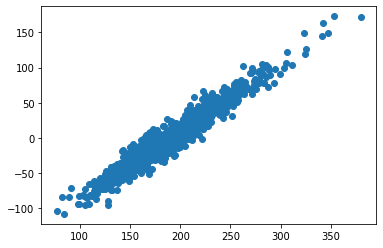

In [20]:
residuals=y_test - y_preds
plt.scatter(x=y_test,y=residuals)